In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

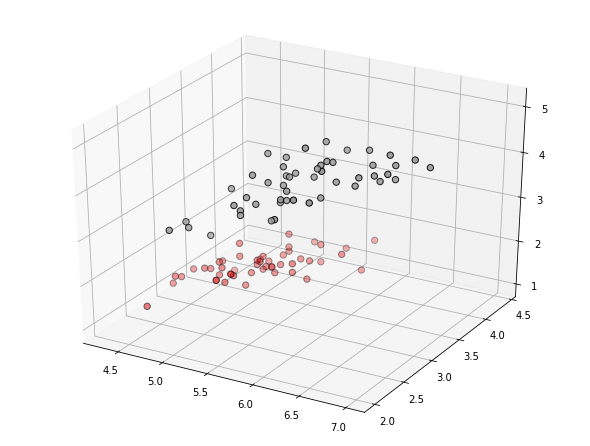

In [241]:
iris = datasets.load_iris()
X = iris.data[:100, :3]  # we only take the first two features.
y = iris.target[:100]


In [242]:
p1=df.iloc[0,[0,1,2]].values
print(p1)
p2=df.iloc[49,[0,1,2]].values
print(p2)

def euclidean_distance(p1, p2):
    result=[(p1[i]-p2[i])**2 for i in range(len(p1))]
    return (sum(result))**0.5

euclidean_distance(p1, p2)

[5.1 3.5 1.4]
[5.0 3.3 1.4]


0.22360679774997896

In [246]:
def KNN(target, feature_array, label_array, k):
    feature_array=feature_array.tolist()
    label_array=label_array.tolist()
    distance_array = [(feature_array[i], label_array[i], euclidean_distance(target, feature_array[i]))
                        for i in range(len(feature_array))
                        if target != feature_array[i]]
    distance_array.sort(key = lambda x : x[2])
    return distance_array[0:k-1]
test = KNN(X_data[49], X, y, 5)


Target Point P =  [5.  3.3 1.4]
k =  5
____________________________________
Point 0 =  [5.0, 3.4, 1.5]
Point Label =  0
Point Distance =  0.14142135623730964
Point 1 =  [5.1, 3.4, 1.5]
Point Label =  0
Point Distance =  0.17320508075688762
Point 2 =  [5.0, 3.2, 1.2]
Point Label =  0
Point Distance =  0.22360679774997877
Point 3 =  [5.1, 3.5, 1.4]
Point Label =  0
Point Distance =  0.22360679774997896
____________________________________


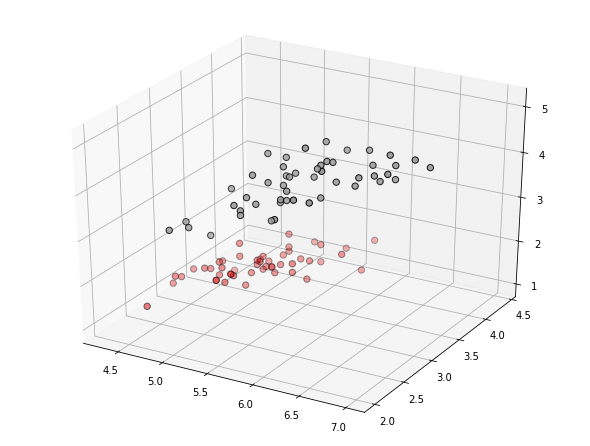

In [249]:
def show_KNN(i,X_data,k):
    print("\nTarget Point P = ", X_data[i])
    print("k = ", k)
    print("____________________________________")
    for i in range(len(test)):
        print("Point {} = ".format(i), test[i][0])
        print("Point Label = ", test[i][1])
        print("Point Distance = ", test[i][2])
    print("____________________________________")  
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig)
    ax.scatter(X[:100, 0], X[:100, 1], X[:100, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
    plt.show()
show_KNN(49,X,5)

---

Using sklearn to see how KNN works

---

In [3]:
df_train=pd.read_csv("train_data.csv")
df_train

,x1,x2,y
0,-3.84,-4.40,0
1,16.36,6.54,1
2,-2.73,-5.13,0
3,4.83,7.22,1
4,3.66,-5.34,0
...,...,...,...
595,-1.03,-5.81,0
596,1.11,4.33,1
597,-3.33,-5.00,0
598,3.58,1.97,1


In [4]:
x_train=df_train.iloc[:,:2].values
x_train

array([[-3.84, -4.4 ],
       [16.36,  6.54],
       [-2.73, -5.13],
       ...,
       [-3.33, -5.  ],
       [ 3.58,  1.97],
       [ 5.41,  4.52]])

In [5]:
y_train=df_train["y"].values
y_train

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

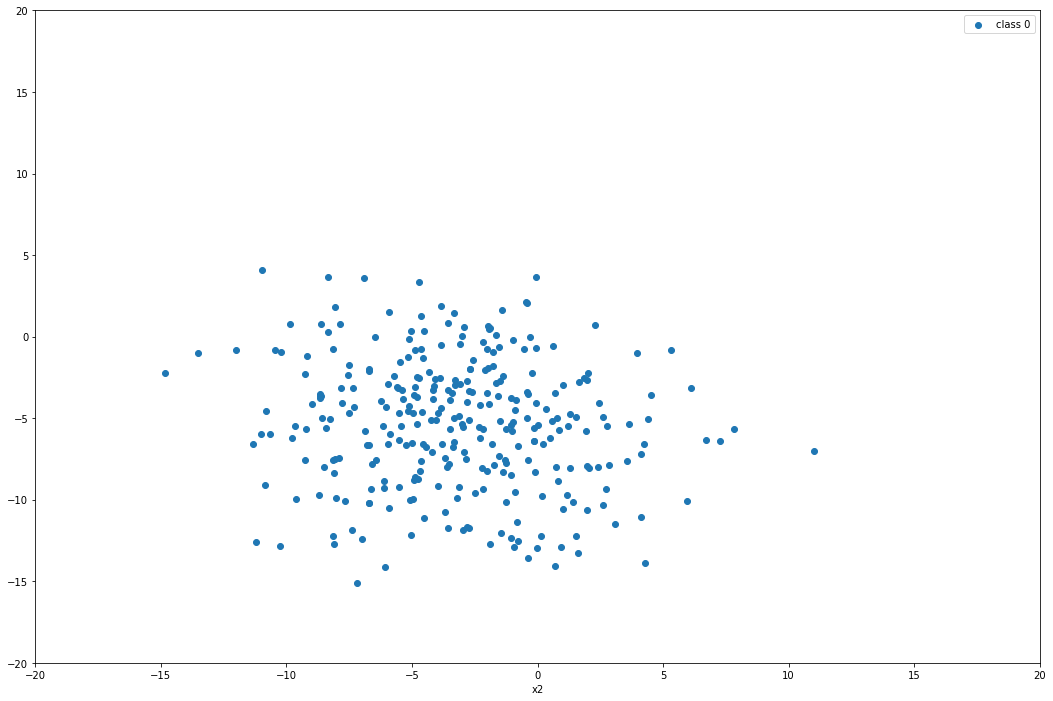

In [6]:
plt.figure(figsize=(18,12))
plt.scatter(x_train[y_train == 0,0],
           x_train[y_train == 0,1],
           label="class 0",)
plt.xlabel("x1")
plt.xlabel("x2")
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.legend(loc="upper right")

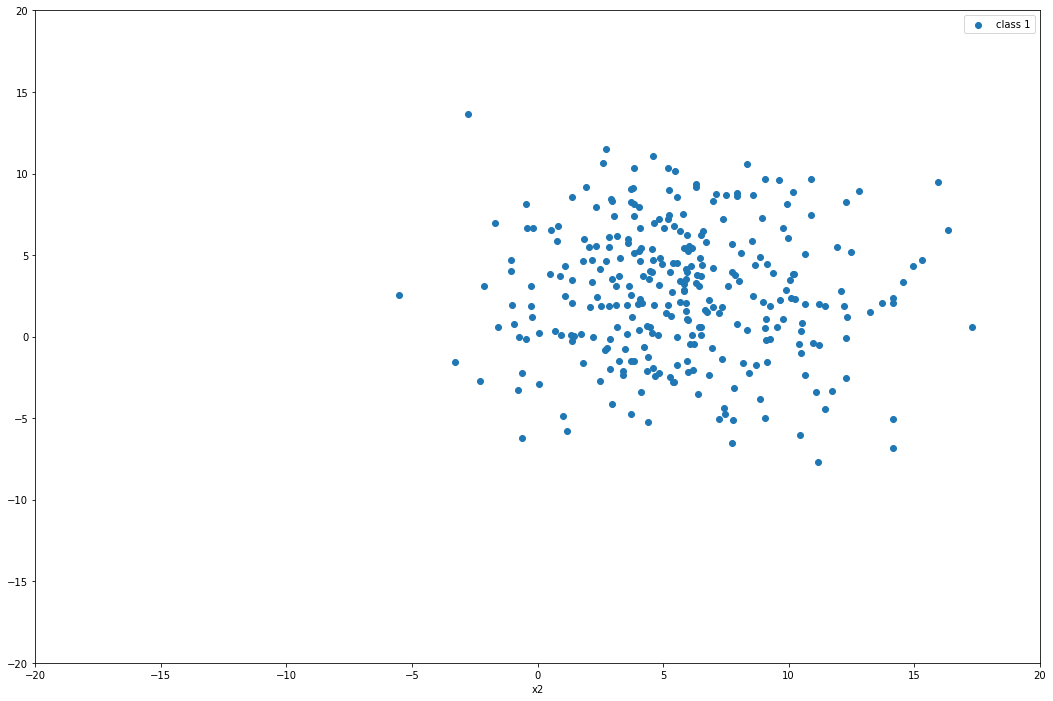

In [7]:
plt.figure(figsize=(18,12))
plt.scatter(x_train[y_train == 1,0],
           x_train[y_train == 1,1],
           label="class 1",)
plt.xlabel("x1")
plt.xlabel("x2")
plt.xlim([-20,20])
plt.ylim([-20,20])
plt.legend(loc="upper right")

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

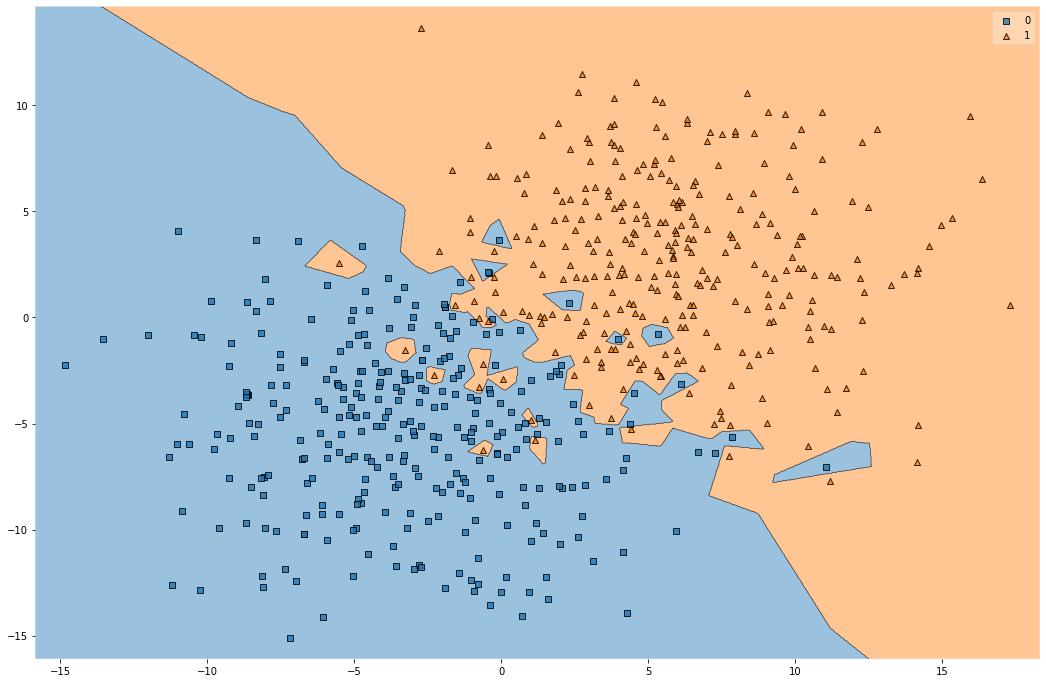

In [9]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(18,12))
plot_decision_regions(x_train,y_train,knn)

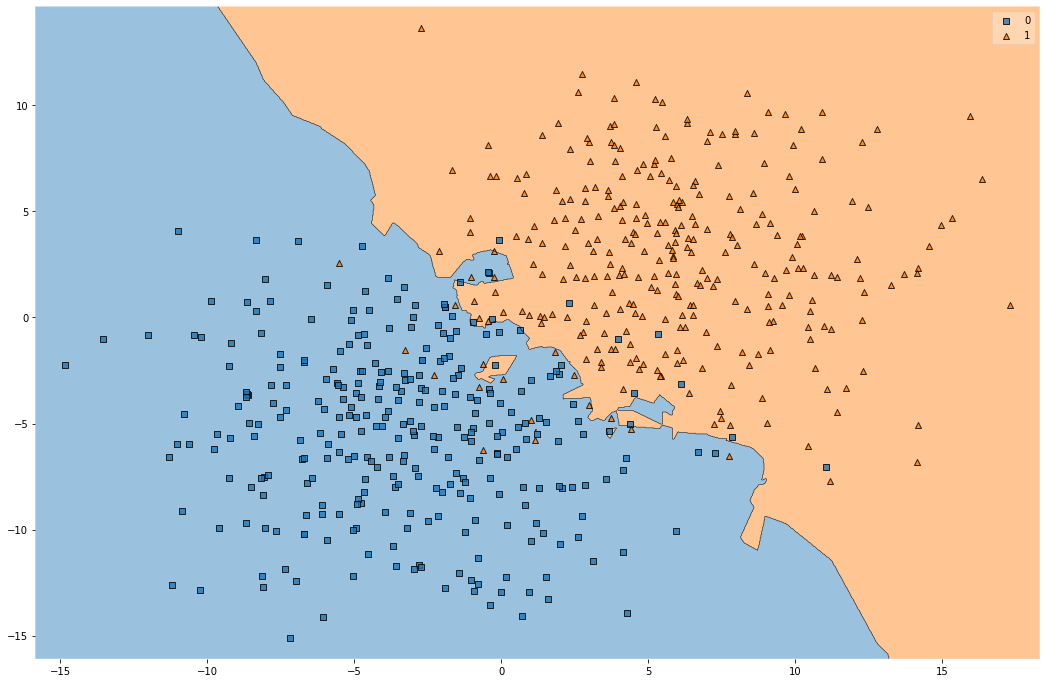

In [10]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
plt.figure(figsize=(18,12))
plot_decision_regions(x_train,y_train,knn)

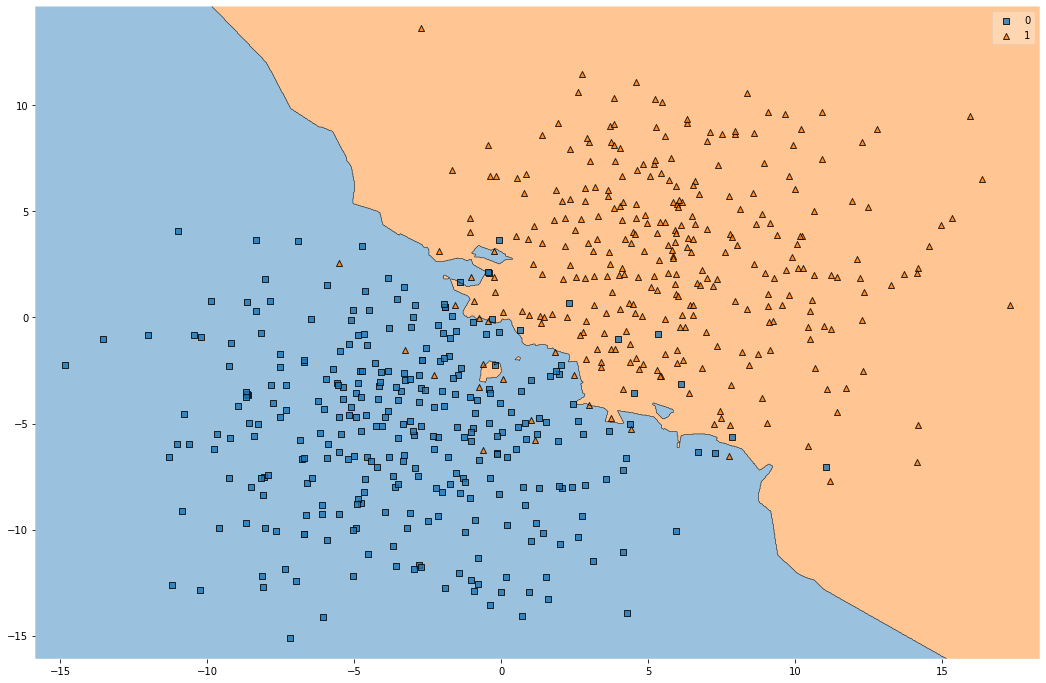

In [11]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
plt.figure(figsize=(18,12))
plot_decision_regions(x_train,y_train,knn)

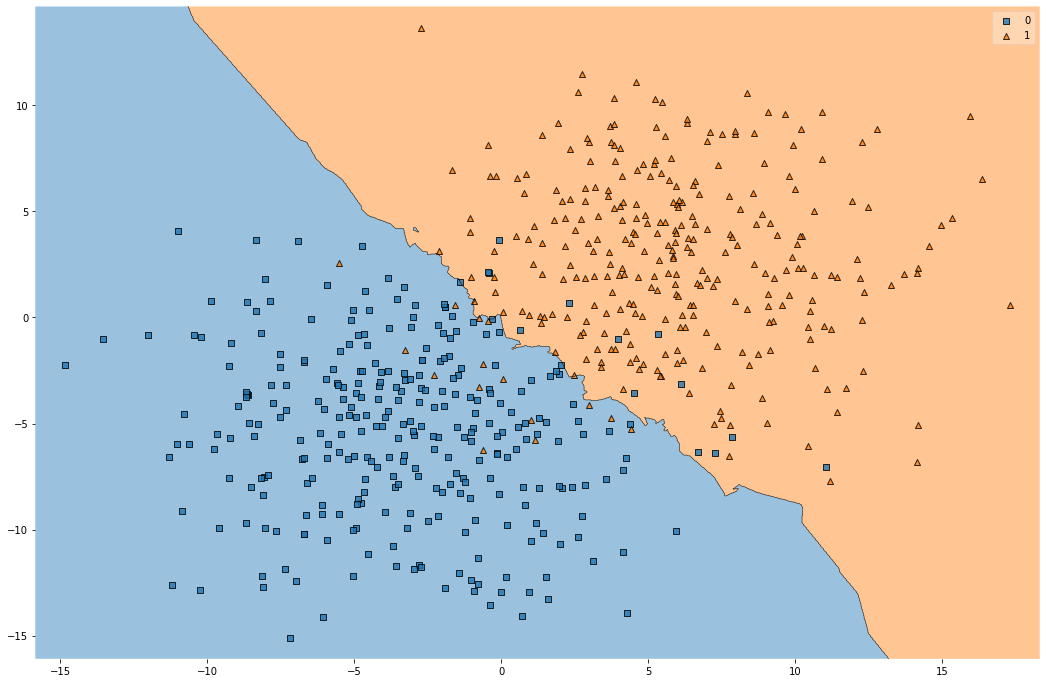

In [12]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
plt.figure(figsize=(18,12))
plot_decision_regions(x_train,y_train,knn)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=123)

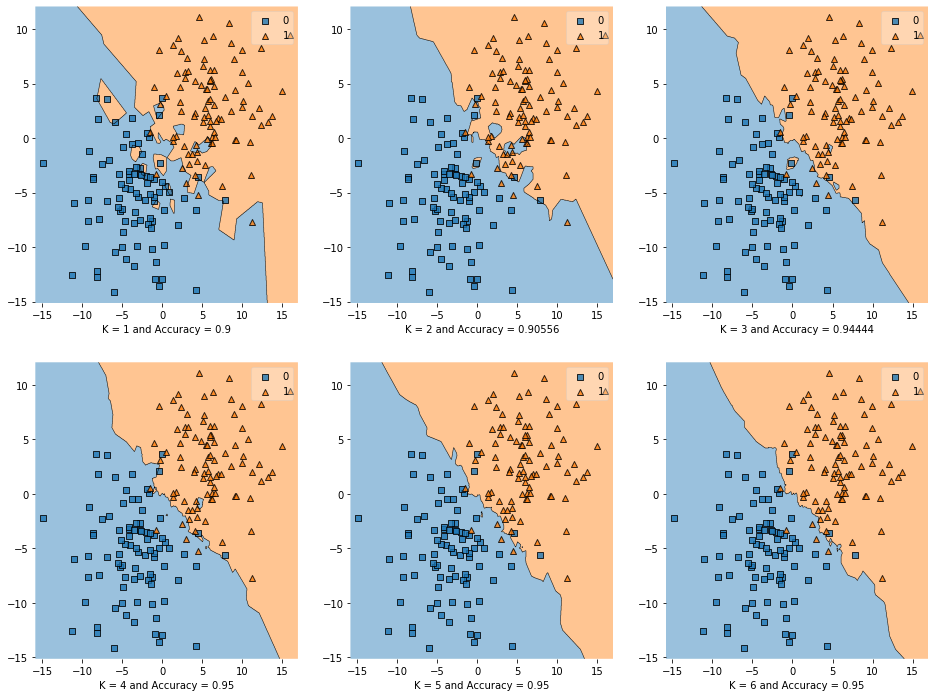

In [14]:
fig, axs = plt.subplots(2,3,figsize=(16,12))
for k,ax in zip([k+1 for k in range(0,6)],axs.flat):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sub,y_train_sub)
    y_pred=knn.predict(x_val)
    score=round(metrics.accuracy_score(y_val,y_pred),5)
    plot_decision_regions(x_val,y_val,knn,ax=ax)
    ax.set_xlabel('K = {} and Accuracy = {}'.format(k,score))

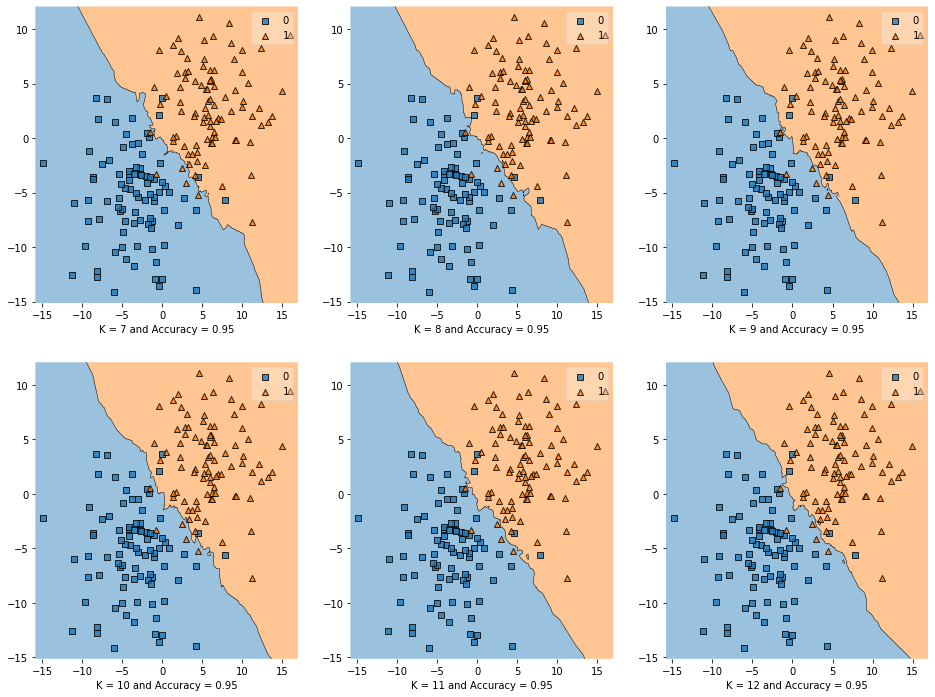

In [15]:
fig, axs = plt.subplots(2,3,figsize=(16,12))
for k,ax in zip([k+1 for k in range(6,12)],axs.flat):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sub,y_train_sub)
    y_pred=knn.predict(x_val)
    score=round(metrics.accuracy_score(y_val,y_pred),5)
    plot_decision_regions(x_val,y_val,knn,ax=ax)
    ax.set_xlabel('K = {} and Accuracy = {}'.format(k,score))

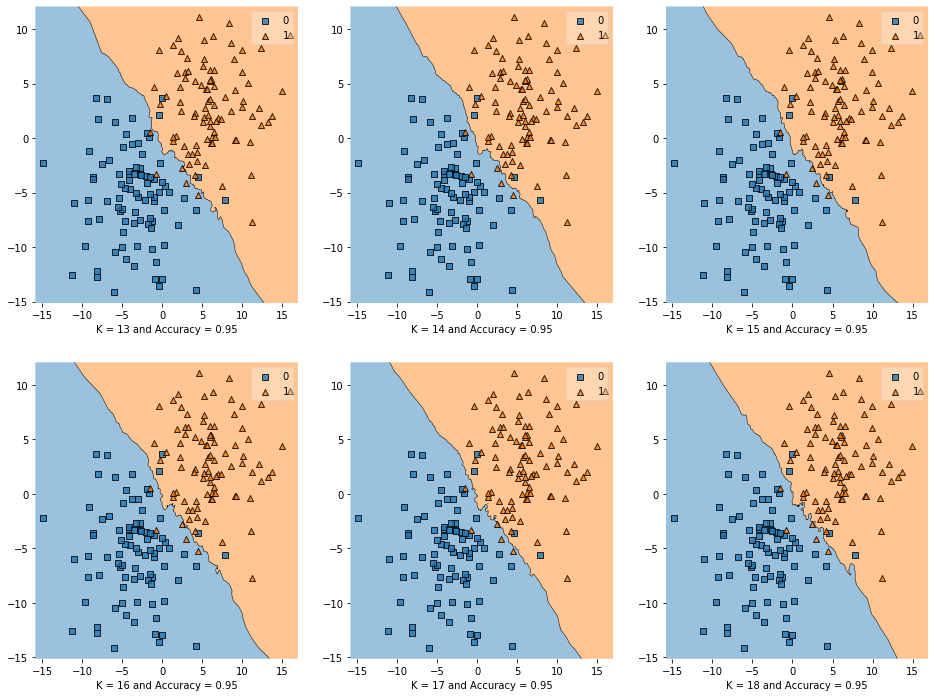

In [16]:
fig, axs = plt.subplots(2,3,figsize=(16,12))
for k,ax in zip([k+1 for k in range(12,18)],axs.flat):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sub,y_train_sub)
    y_pred=knn.predict(x_val)
    score=round(metrics.accuracy_score(y_val,y_pred),5)
    plot_decision_regions(x_val,y_val,knn,ax=ax)
    ax.set_xlabel('K = {} and Accuracy = {}'.format(k,score))

In [17]:
df_test=pd.read_csv("train_data.csv")
df_test

,x1,x2,y
0,-3.84,-4.40,0
1,16.36,6.54,1
2,-2.73,-5.13,0
3,4.83,7.22,1
4,3.66,-5.34,0
...,...,...,...
595,-1.03,-5.81,0
596,1.11,4.33,1
597,-3.33,-5.00,0
598,3.58,1.97,1


In [18]:
x_test=df_test.iloc[:,:2].values
y_test=df_test["y"].values

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

Text(0.5, 0, 'K = 12 and Accuracy = 0.94667')

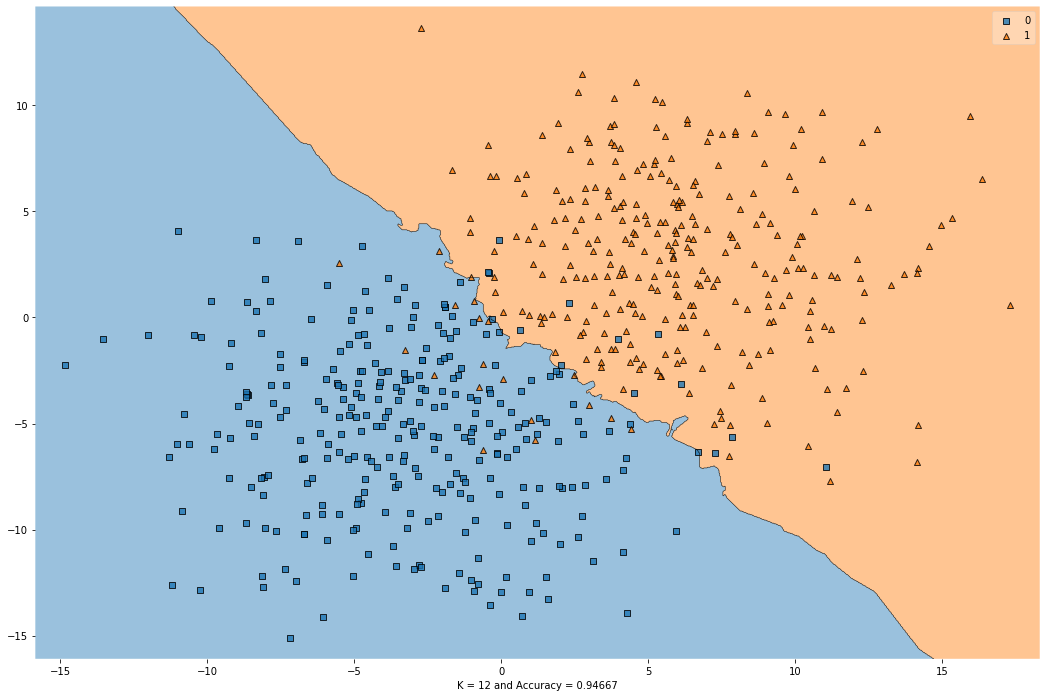

In [22]:
from mlxtend.plotting import plot_decision_regions
y_pred=knn.predict(x_test)
score=round(metrics.accuracy_score(y_test,y_pred),5)
plt.figure(figsize=(18,12))
plot_decision_regions(x_test,y_test,knn)
plt.xlabel('K = 12 and Accuracy = {}'.format(score)) 